In [37]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [3]:
#load datasets

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
#analyze data

print(customers.head())
print("\n")
print(products.head())
print("\n")
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

In [9]:
#Prepare data
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [13]:
# Feature Engineering
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': lambda x: x.nunique(),
    'Region': 'first'
}).reset_index()

customer_features.rename(columns={'ProductID': 'UniqueProducts'}, inplace=True)

In [15]:
#convert categorical data into numerical data
customer_features = pd.get_dummies(customer_features, columns=['Region'])

In [23]:
# Normalizing Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [29]:
#Clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(scaled_features)
clusters = kmeans.fit_predict(scaled_features)
customer_features['Cluster'] = clusters

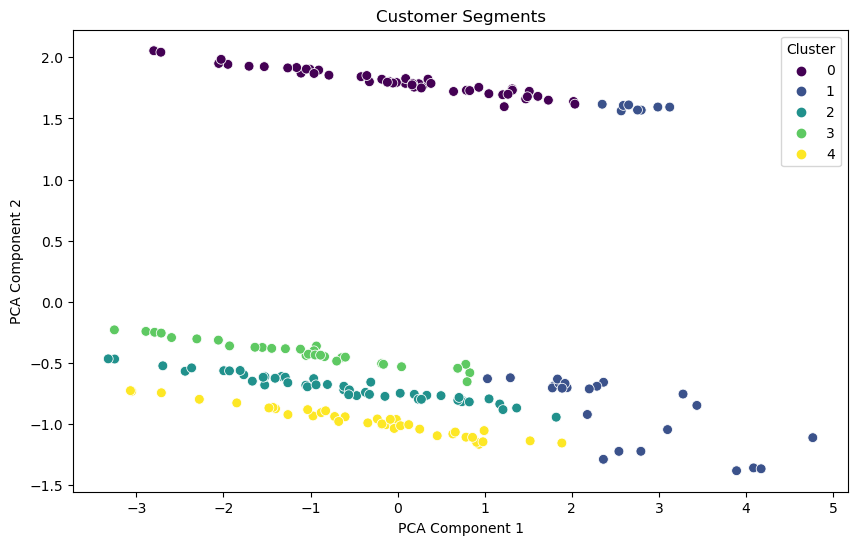

In [39]:
# Visualize Clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()